# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


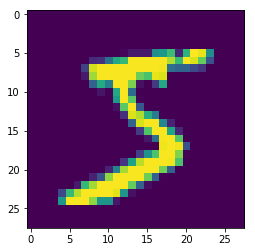

In [49]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [52]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [54]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
# First CODE
# Fixing the architecture in this code block. Using the convolution block followed by transition and then 
# convolution block and finally using huge size kernel to reduce the channel to single number

# Starting with the 32 kernels and going to 64, then 128 in each convolution block 
# and the using 1X1 kernel to reduce the number of channels back to 32

#Observation before this code block i.e first DNN code that was provided : Params - 68,260 , val_acc after 10th epock - 98.27 

from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26, RF 3

model.add(Convolution2D(64, 3, 3, activation='relu')) # 24, RF 5
model.add(Convolution2D(128, 3, 3, activation='relu')) # 22, RF 7

model.add(MaxPooling2D(pool_size=(2, 2))) # 11, RF 14
model.add(Convolution2D(32, 1, 1, activation='relu')) # 11, No Change in RF here

model.add(Convolution2D(64, 3, 3, activation='relu')) # 9, RF 16
model.add(Convolution2D(128, 3, 3, activation='relu')) # 7, RF 18

model.add(Convolution2D(10, 1, activation='relu')) #7, No Change in RF here
model.add(Convolution2D(10, 7)) #1, RF 28
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# validation_data argument is used to run the n/w on validation data set after each epoch
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, 
          validation_data=(X_test, Y_test))  

score = model.evaluate(X_test, Y_test, verbose=0)

print(score)

# Observation : Here number of params is huge i.e at 195,352. And val_acc at 3rd epoch itself is 99.12
# and got val_acc of 99.11 at 9th epoch and 99.01 at 10th epoch
# Here no. of params is huge but that is OK, because in this code block we just tried to fix the architecture.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
W0818 18:41:16.152421 139706914322304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 32)        4128      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [59]:
# Second CODE
# In this code block, lets play with the number of kernels to reduce the total params 
# by keeping the architecture fixed. And lets observe the val accuracy

# Also introcuding the batch normalization in this code block.
# Few points about BN : 
#  1. Makes sure all channels to be in similar amplitude.
#  2. BN happens on each channel
#  3. Pushes all the values in the channel to be between -1 and +1 ( Channel Normlization ) 
#  4. Benefit of Batch Normalization is not so evident here because MNIST is a 
#     very easy dataset. ( Hence used BN in 2nd code block itself alomg with reducing the number of kernels ) 


# Below are the changes done to this code block in steps and observation of each step 
# (Note: only final step is shown in this code block) 

# STEP 1 :
# Number of kernels used are 10,10,20 then 10,20,10,10
# Observation -> No. of params : 10,890, val_acc : 99.08 at 8th epoch

# STEP 2 :
# Increasing the bacth_size from 32 to 128
# Observation -> Thes network ran faster i.e 4s for each epoch as opposed to 13 sec previoously
#                val_acc found to be 98.65 at 10th epoch. acc appears to be reduced 

# STEP 3 : 
# Introduce bacth Normalization after each layer
# Observation -> Total params increased a bit due to BN. and found some non trainable params
#                val_acc : 99.07 at 7th epoch. Time taken for each epoch is slightly higher now. ie, around 7 sec


# STEP 4 : 
# Increase the number of kernels -> 10, 16, 32 and 10, 16, 32
# Observation -> Total parasm : 18,366 ( within 20k )
#                val_acc : 99.08 at 4th epoch itself and consistemtly 99.0 some thing in epoch s after 6th one.


from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26, RF 3
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) # 24, RF 5
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22, RF 7
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11, RF 14
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11, No Change in RF here
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9, RF 16
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7, RF 18
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) #7, No Change in RF here
model.add(BatchNormalization())
model.add(Convolution2D(10, 7)) #1, RF 28
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# validation_data argument is used to run the n/w on validation data set after each epoch
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1, 
          validation_data=(X_test, Y_test))  

score = model.evaluate(X_test, Y_test, verbose=0)

print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_17 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.1891 - acc: 0.9433 - val_loss: 0.0599 - val_acc: 0.9816
Epoch 2/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0446 - acc: 0.9866 - val_loss: 0.0430 - val_acc: 0.9853
Epoch 3/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0330 - acc: 0.9896 - val_loss: 0.0308 - val_acc: 0.9895
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0243 - acc: 0.9924 - val_loss: 0.0289 - val_acc: 0.9908
Epoch 5/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0209 - acc: 0.9933 - val_loss: 0.0308 - val_acc: 0.9901
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0178 - acc: 0.9944 - val_loss: 0.0311 - val_acc: 0.9892
Epoch 7/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0143 - acc: 0.9955 - val_loss: 0.0275 -

In [62]:
# Third CODE

# Few points from previous code block are, architecture is fixed, total params are well within in 20k and 
# val accuracy is promisimg to increase

# Main thing observed in previous code is from 4th epoch we are observing the overfitting i.e 
# train acc is consistenlty greater than val accuracy. hence we will introdue the drop out in this block of code
 
# Dropout will drop some features, thus preventing overfitting i.e making network not to mug-up the details
# Dropout will not apply for validation run. Applied only for tariing run
# Dropout is per batch. i.e for every batch random dropout is different

# STEP 1: 
# Dropout : 0.25 after the network is found all edges and textures.
# Observation -> val_acc : 99.13 at 8th and 99.10 at 10th epochs

# STEP 2: 
# Dropout : 0.1 after each conv layer using 3X3.
# Observation -> val_acc : 99.15 at 9th and 99.11 at 10th epoch. Not much difference from previous step

# STEP 3: 
# Increase epochs to 20
# Observation -> val_acc : 99.31 (at train acc of 0.9945 hence training it a bit more may reflect in val acc as well)
#                ( We are almost near the desired 99.4 acc) at 15th epoch and 99.14 at 20th epoch. 
#                Looks like again its going to overfit. Not sure about it though

from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26, RF 3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24, RF 5
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22, RF 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11, RF 14
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11, No Change in RF here
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9, RF 16
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7, RF 18
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 1, activation='relu')) #7, No Change in RF here
model.add(BatchNormalization())
model.add(Convolution2D(10, 7)) #1, RF 28
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# validation_data argument is used to run the n/w on validation data set after each epoch
model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=1, 
          validation_data=(X_test, Y_test))  

score = model.evaluate(X_test, Y_test, verbose=0)

print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: U

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_36 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 22, 22, 32)        4640      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.2851 - acc: 0.9115 - val_loss: 0.0901 - val_acc: 0.9699
Epoch 2/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0670 - acc: 0.9793 - val_loss: 0.0441 - val_acc: 0.9843
Epoch 3/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0486 - acc: 0.9847 - val_loss: 0.0338 - val_acc: 0.9887
Epoch 4/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0410 - acc: 0.9871 - val_loss: 0.0260 - val_acc: 0.9907
Epoch 5/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0344 - acc: 0.9892 - val_loss: 0.0244 - val_acc: 0.9924
Epoch 6/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.0318 - acc: 0.9901 - val_loss: 0.0267 - val_acc: 0.9914
Epoch 7/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0291 - acc: 0.9907 - val_loss: 0.0243 -

In [64]:
# Fourth CODE

# Till now the learning rate was fixed. In this code block reducing the lr for each epoch

# STEP 1: 
# Start LR at 0.03 and reduce after each epoch
# Observation -> Reached the desired val acc of 99.4 at 14th epoch



from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26, RF 3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24, RF 5
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22, RF 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11, RF 14
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11, No Change in RF here
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9, RF 16
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7, RF 18
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 1, activation='relu')) #7, No Change in RF here
model.add(BatchNormalization())
model.add(Convolution2D(10, 7)) #1, RF 28
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# validation_data argument is used to run the n/w on validation data set after each epoch
model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=1, 
          validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])  

score = model.evaluate(X_test, Y_test, verbose=0)

print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update y

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_50 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_18 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_51 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_19 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 22, 22, 32)        4640      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 15s 243us/step - loss: 0.1533 - acc: 0.9511 - val_loss: 0.0434 - val_acc: 0.9856
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 8s 128us/step - loss: 0.0502 - acc: 0.9841 - val_loss: 0.0394 - val_acc: 0.9866
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 8s 126us/step - loss: 0.0376 - acc: 0.9883 - val_loss: 0.0358 - val_acc: 0.9883
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 8s 128us/step - loss: 0.0323 - acc: 0.9900 - val_loss: 0.0248 - val_acc: 0.9916
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[5.4745844e-20 1.1936952e-18 4.2862171e-14 1.6672766e-07 1.3009473e-21
  3.1398372e-18 6.2998445e-33 9.9999988e-01 5.5436689e-10 2.5990571e-11]
 [1.2715969e-13 1.9593703e-14 1.0000000e+00 1.2292611e-15 9.1097164e-25
  2.7713714e-19 4.4067847e-10 5.8717919e-24 3.9734349e-15 8.9926798e-23]
 [2.3215026e-10 9.9998415e-01 5.6223435e-08 1.8260439e-10 5.4041766e-06
  6.3530087e-10 4.0493864e-10 3.3467902e-07 1.0188879e-05 1.3110549e-10]
 [1.0000000e+00 1.3568867e-19 6.1946098e-10 3.1651038e-18 1.3641689e-18
  1.4489866e-16 1.4763991e-12 3.6941745e-11 2.5052068e-11 2.1502346e-12]
 [8.0488012e-12 2.9077440e-18 2.3007634e-14 4.0231205e-14 1.0000000e+00
  3.1624124e-18 1.9474217e-14 2.3602691e-12 4.5549609e-10 7.8210523e-09]
 [1.9419195e-12 9.9992573e-01 2.7420657e-10 3.9928985e-12 2.9053572e-07
  1.1710764e-14 7.7125528e-14 2.9030503e-05 4.4911598e-05 2.1315798e-10]
 [6.9364885e-22 8.2730885e-15 3.5243225e-12 8.4673716e-15 9.9995542e-01
  5.7854302e-13 9.0233506e-21 8.4725960e-10 4.4563072e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored